In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_json('data/train.json')
train['inc_angle'] = pd.to_numeric(train['inc_angle'],errors='coerce')

In [4]:
def get_stats(train,label=1):
    train['max'+str(label)] = [np.max(np.array(x)) for x in train['band_'+str(label)] ]
    train['maxpos'+str(label)] = [np.argmax(np.array(x)) for x in train['band_'+str(label)] ]
    train['min'+str(label)] = [np.min(np.array(x)) for x in train['band_'+str(label)] ]
    train['minpos'+str(label)] = [np.argmin(np.array(x)) for x in train['band_'+str(label)] ]
    train['med'+str(label)] = [np.median(np.array(x)) for x in train['band_'+str(label)] ]
    train['std'+str(label)] = [np.std(np.array(x)) for x in train['band_'+str(label)] ]
    train['mean'+str(label)] = [np.mean(np.array(x)) for x in train['band_'+str(label)] ]
    train['p25_'+str(label)] = [np.sort(np.array(x))[int(0.25*75*75)] for x in train['band_'+str(label)] ]
    train['p75_'+str(label)] = [np.sort(np.array(x))[int(0.75*75*75)] for x in train['band_'+str(label)] ]
    train['mid50_'+str(label)] = train['p75_'+str(label)]-train['p25_'+str(label)]

    return train
train = get_stats(train,1)
train = get_stats(train,2)

In [5]:
def plot_var(name,nbins=50):
    minval = train[name].min()
    maxval = train[name].max()
    plt.hist(train.loc[train.is_iceberg==1,name],range=[minval,maxval],
             bins=nbins,color='b',alpha=0.5,label='Boat')
    plt.hist(train.loc[train.is_iceberg==0,name],range=[minval,maxval],
             bins=nbins,color='r',alpha=0.5,label='Iceberg')
    plt.legend()
    plt.xlim([minval,maxval])
    plt.xlabel(name)
    plt.ylabel('Number')
    plt.show()

/home/lbg/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/lbg/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


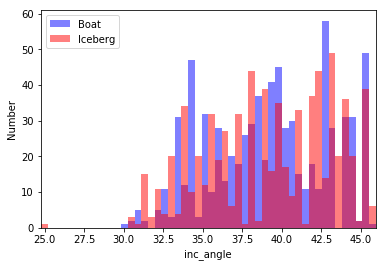

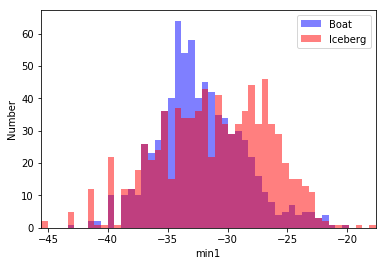

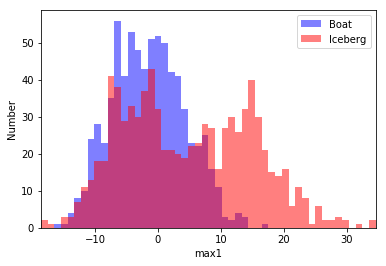

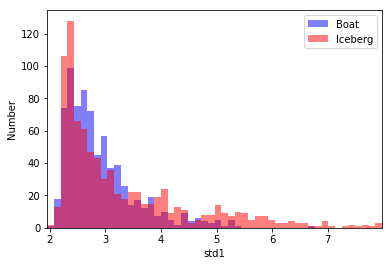

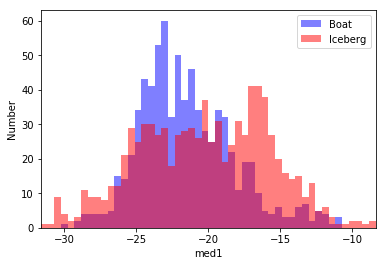

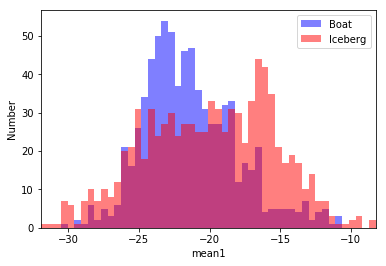

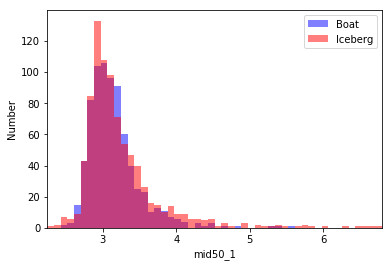

In [6]:
for col in ['inc_angle','min1','max1','std1','med1','mean1','mid50_1']:
    plot_var(col)

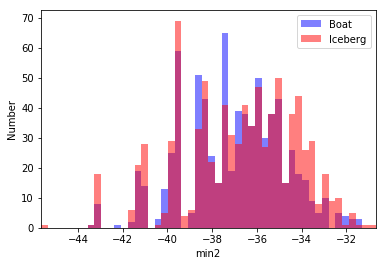

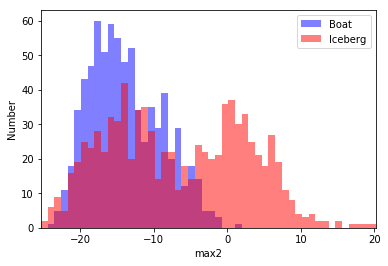

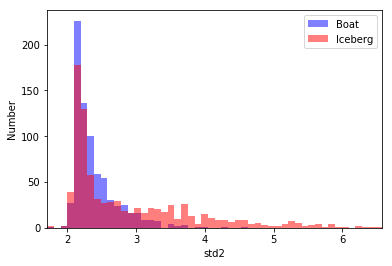

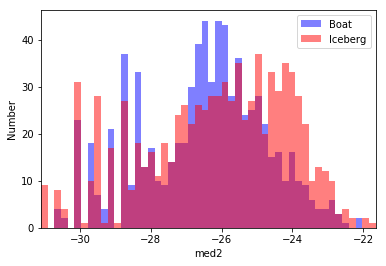

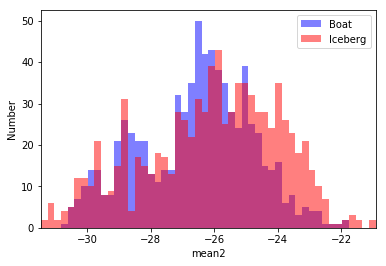

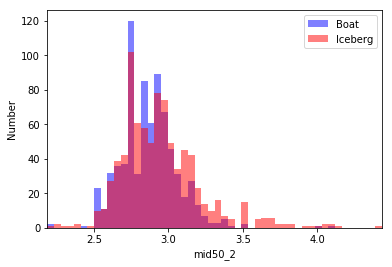

In [7]:
for col in ['min2','max2','std2','med2','mean2','mid50_2']:
    plot_var(col)

In [8]:
train_stats = train.drop(['id','is_iceberg','band_1','band_2'],axis=1)

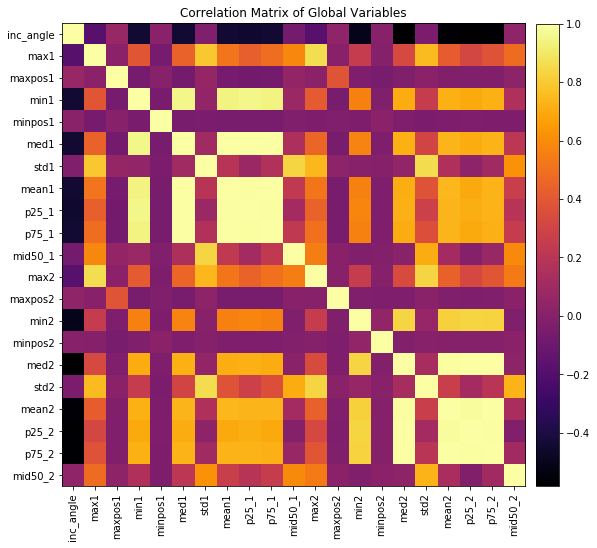

In [9]:
corr = train_stats.corr()
fig = plt.figure(1, figsize=(10,10))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(train_stats.columns))
plt.xticks(labels,train_stats.columns,rotation=90)
plt.yticks(labels,train_stats.columns)
plt.title('Correlation Matrix of Global Variables')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.show()

In [10]:
icebergs = train[train.is_iceberg==1].sample(n=9,random_state=123)
ships = train[train.is_iceberg==0].sample(n=9,random_state=456)

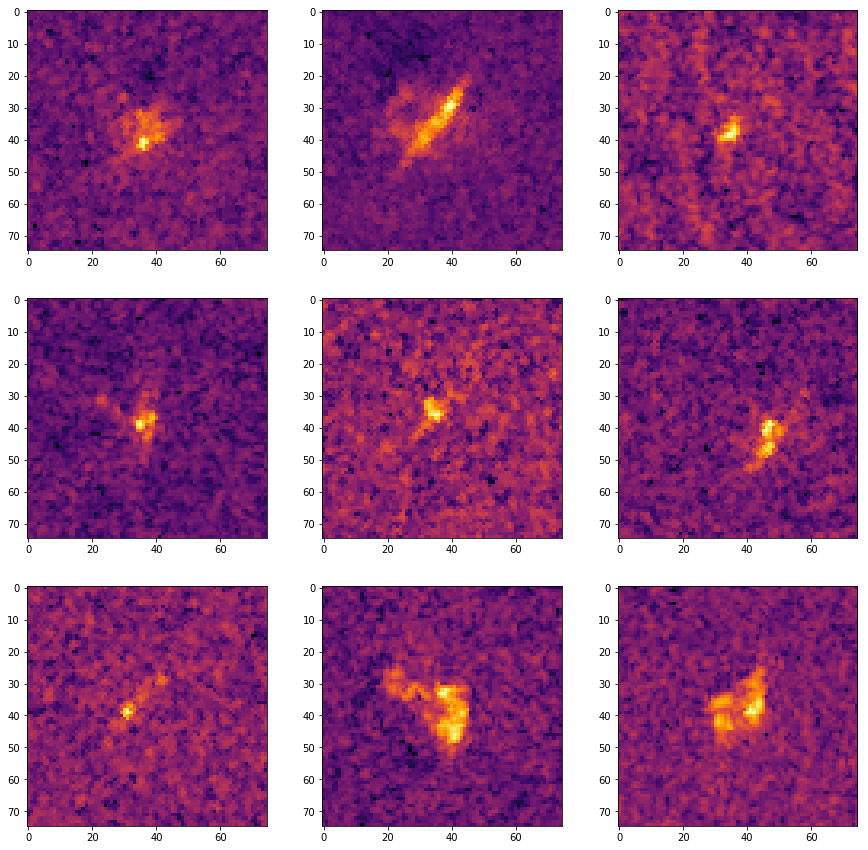

In [11]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,0]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

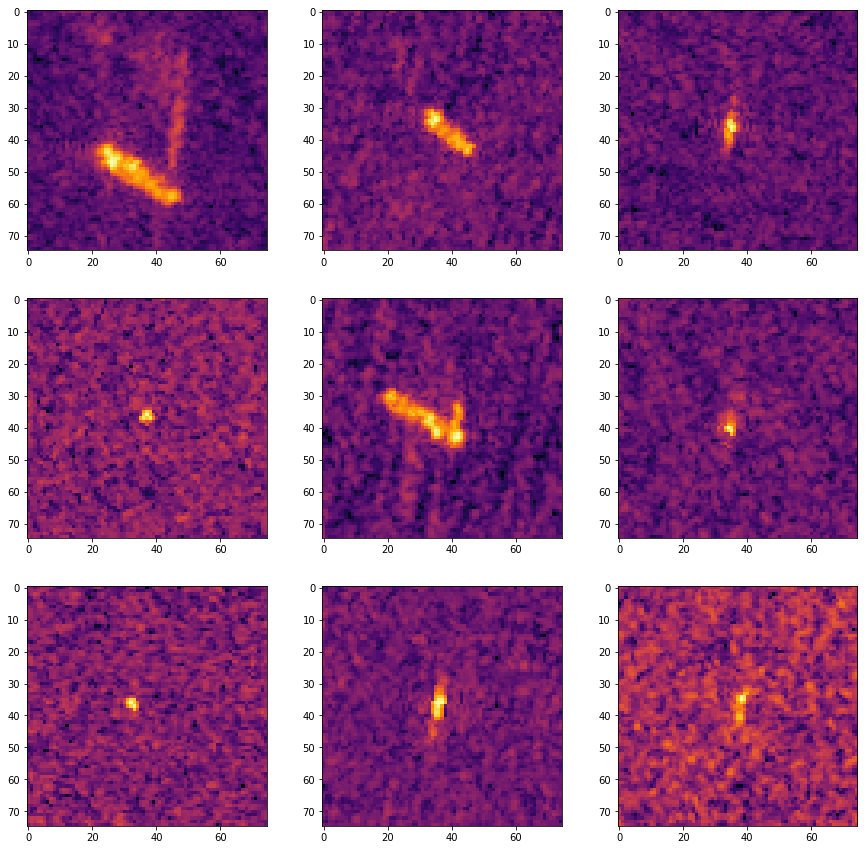

In [12]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,0]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

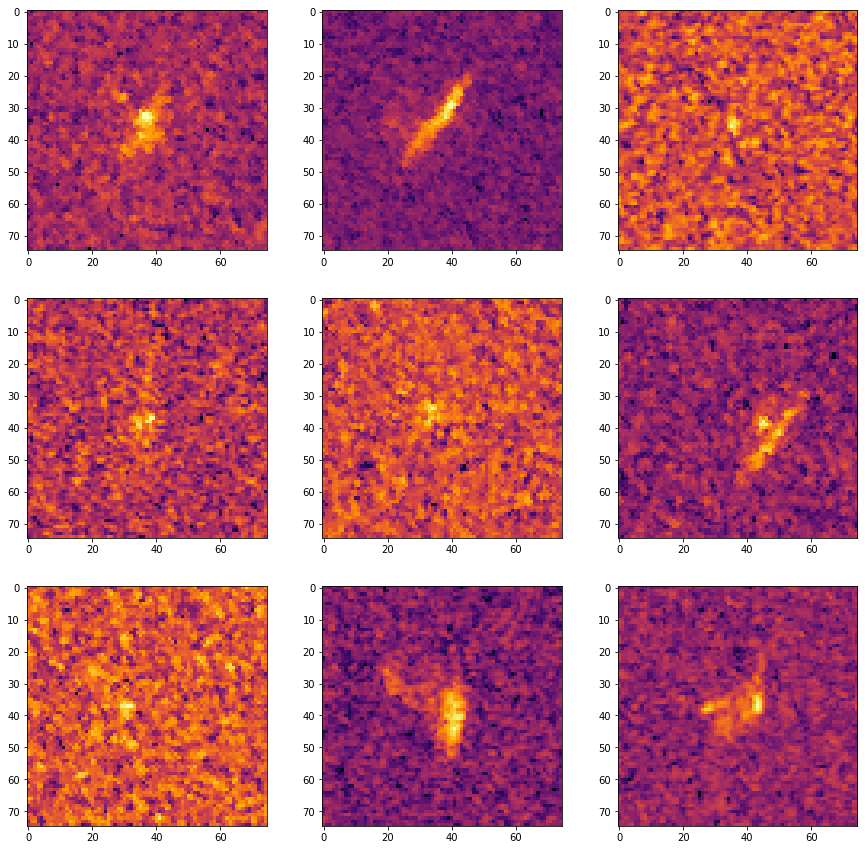

In [13]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,1]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

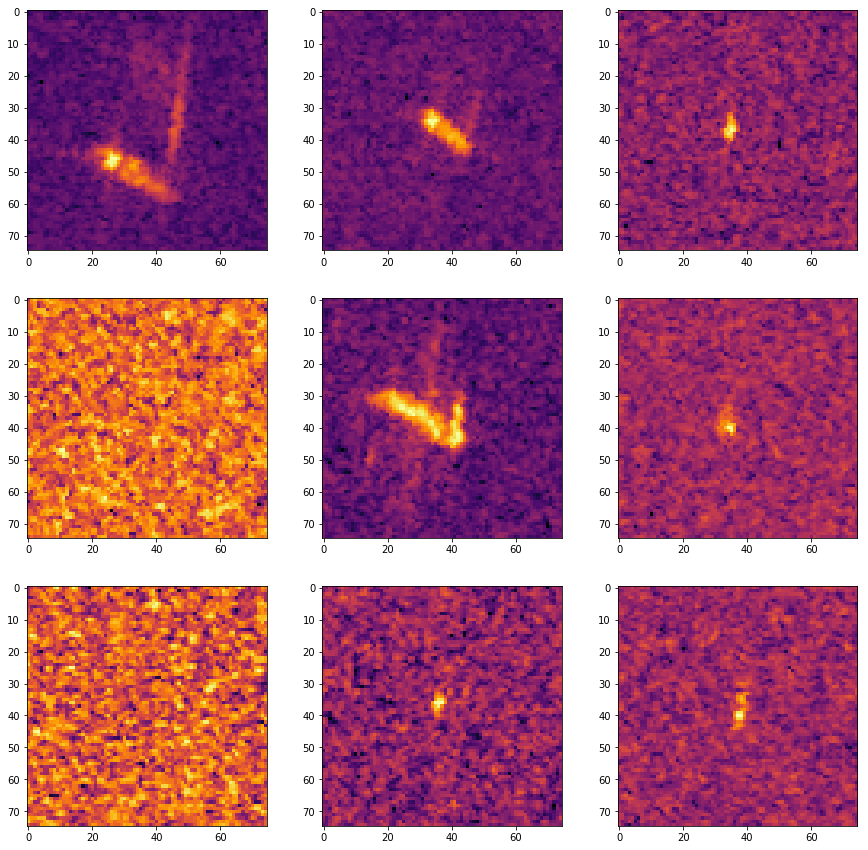

In [14]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,1]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

In [15]:
from scipy import signal

xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])
xder2 = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder2 = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])


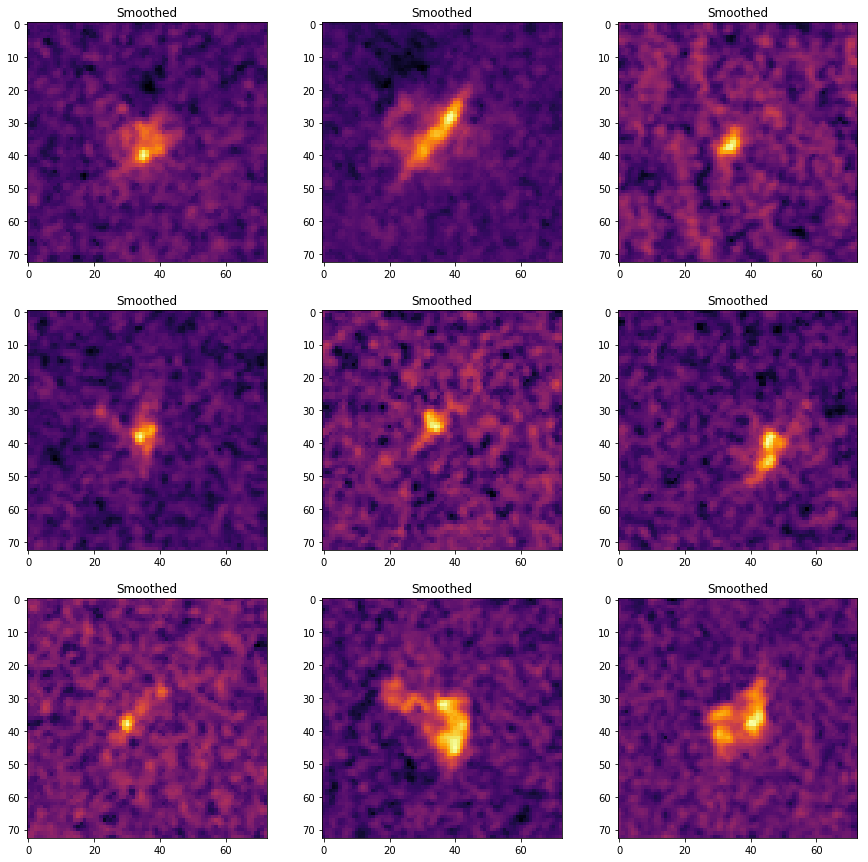

In [16]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = signal.convolve2d(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)),smooth,mode='valid')
    ax.imshow(arr,cmap='inferno')
    ax.set_title('Smoothed')
    
plt.show()

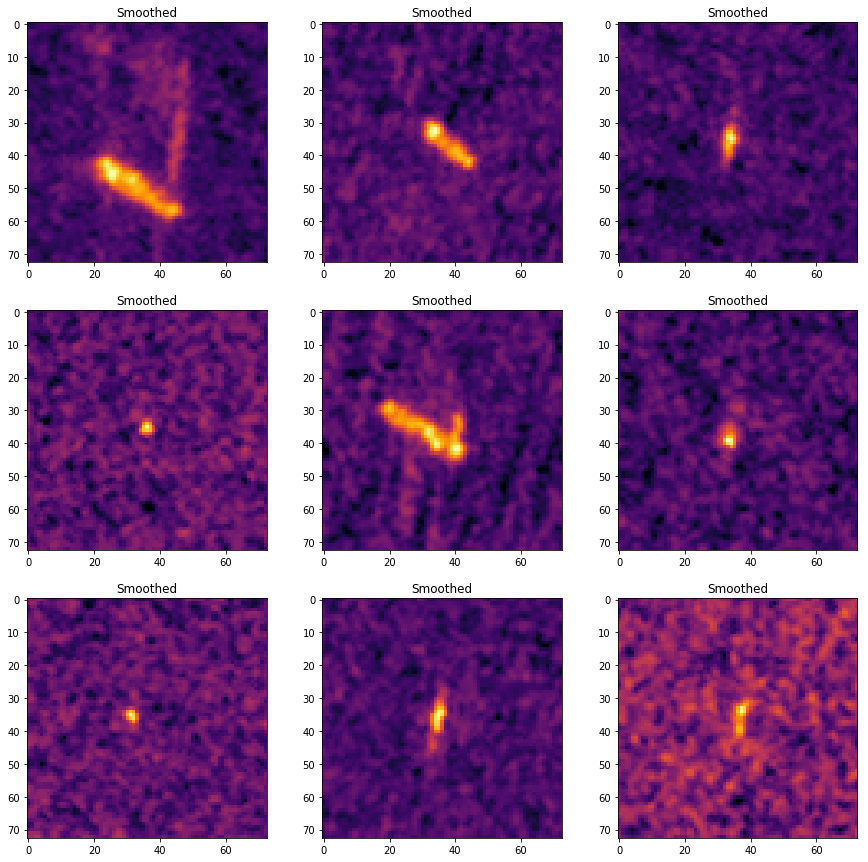

In [17]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = signal.convolve2d(np.reshape(np.array(ships.iloc[i,0]),(75,75)),smooth,mode='valid')
    ax.imshow(arr,cmap='inferno')
    ax.set_title('Smoothed')
    
plt.show()

In [26]:
iceberg = train[train.is_iceberg == 0]
ships = train[train.is_iceberg == 1]
print type(iceberg)
print type(iceberg.iloc)
print ships.shape

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexing._iLocIndexer'>
(753, 25)


In [27]:
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([x_band1[:, :, :, np.newaxis]
                          , x_band2[:, :, :, np.newaxis]
                         , ((x_band1+x_band1)/2)[:, :, :, np.newaxis]], axis=-1)
X_angle_train = np.array(train.inc_angle)
y_train = np.array(train["is_iceberg"])

In [30]:
print X_train.shape
print y_train.shape
print x_band1.shape
print x_band2.shape

(1604, 75, 75, 3)
(1604,)
(1604, 75, 75)
(1604, 75, 75)


In [31]:
print X_train[0, :, :, :]

[[[-27.87836075 -27.15411758 -27.87836075]
  [-27.15415955 -29.53788757 -27.15415955]
  [-28.66861534 -31.03059959 -28.66861534]
  ..., 
  [-25.57348251 -29.0953083  -25.57348251]
  [-26.48867416 -29.5408783  -26.48867416]
  [-30.50701332 -27.51176643 -30.50701332]]

 [[-28.66852951 -31.03051758 -28.66852951]
  [-27.8784008  -33.52933502 -27.8784008 ]
  [-27.50877571 -31.59117508 -27.50877571]
  ..., 
  [-26.4886322  -34.28805542 -26.4886322 ]
  [-28.67156219 -28.26749611 -28.67156219]
  [-31.5941658  -26.48871613 -31.5941658 ]]

 [[-28.66852951 -33.52928925 -28.66852951]
  [-27.15415955 -37.05115891 -27.15415955]
  [-25.86504173 -31.59117508 -25.86504173]
  ..., 
  [-27.1571064  -31.59408379 -27.1571064 ]
  [-27.88139343 -32.19338989 -27.88139343]
  [-32.83712387 -29.54092026 -32.83712387]]

 ..., 
 [[-29.09290504 -27.87895012 -29.09290504]
  [-28.66916275 -27.87899208 -28.66916275]
  [-30.50461197 -30.00814056 -30.50461197]
  ..., 
  [-30.0110054  -25.28922081 -30.0110054 ]
  [-25.86

In [33]:
print X_angle_train.shape
print X_angle_train[0]

(1604,)
43.9239
